In [ ]:
import pandas as pd

diab_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP-ML-M2-dataset/diabetes.csv")

In [ ]:
diab_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
diab_df.info()

In [ ]:
diab_df.columns = diab_df.columns.str.lower()
diab_df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
cols_with_zero_missing = ["glucose", "bloodpressure",
                          "skinthickness", "insulin", "bmi"]
diab_df[cols_with_zero_missing] = diab_df[cols_with_zero_missing].replace(0, pd.NA)
diab_df[cols_with_zero_missing].isnull().sum()

,0
glucose,5
bloodpressure,35
skinthickness,227
insulin,374
bmi,11


##### 2. Nettoyage et prétraitement

In [ ]:
# Imputation par médian.
# C-a-d on remplace les valeurs NaN/0 par la moyenne.
for col in cols_with_zero_missing:
  diab_df[col].fillna({col: diab_df[col].median()}, inplace=True)

##### Standarisation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = diab_df.copy()
df_scaled[diab_df.columns[:-1]] = scaler.fit_transform(df_scaled[diab_df.columns[:-1]])

##  3. EDA (Exploration des données) & Déséquilibre des classes

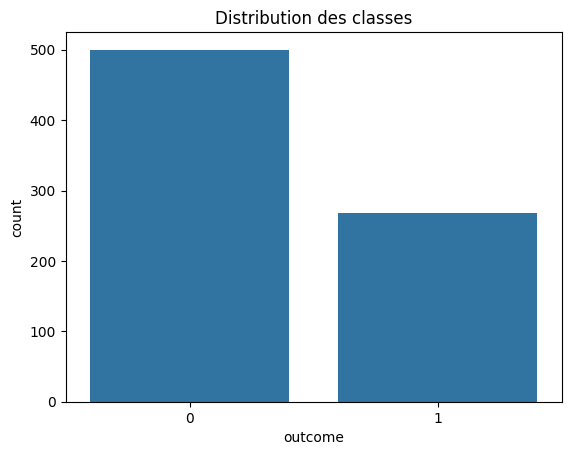

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="outcome", data=diab_df)
plt.title("Distribution des classes")
plt.show()

In [ ]:
diab_df.groupby("outcome").mean()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
outcome,,,,,,,,
0,3.298000,110.682000,70.920000,27.726000,127.792000,30.885600,0.429734,31.190000
1,4.865672,142.130597,75.123134,31.686567,164.701493,35.383582,0.550500,37.067164


In [ ]:
diab_df.groupby("outcome").median()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
outcome,,,,,,,,
0,2.0,107.5,72.0,29.0,125.0,30.40,0.336,27.0
1,4.0,140.0,74.0,29.0,125.0,34.25,0.449,36.0


In [ ]:
# Écart-types
diab_df.groupby('outcome').std()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
outcome,,,,,,,,
0,3.017185,24.707201,11.929385,8.552966,74.447469,6.504128,0.299085,11.667655
1,3.741239,29.568839,11.951672,8.662994,100.932249,6.595603,0.372354,10.968254


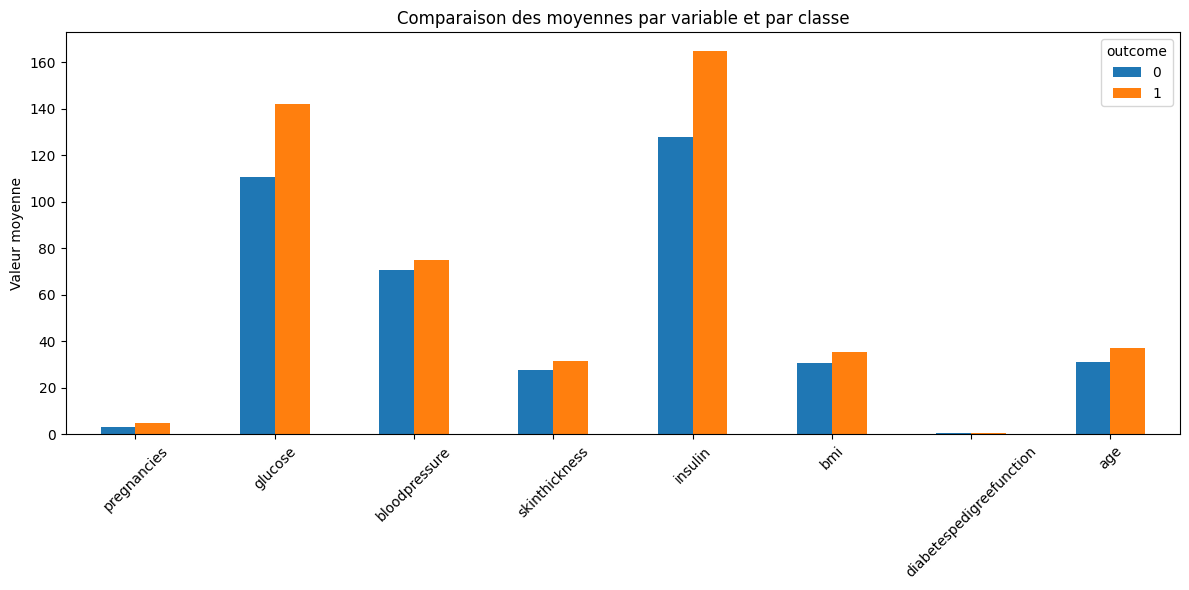

In [ ]:
import matplotlib.pyplot as plt

diab_df.groupby('outcome').mean().T.plot(kind='bar', figsize=(12,6))
plt.title("Comparaison des moyennes par variable et par classe")
plt.ylabel("Valeur moyenne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4. Split Train / Validation / Test

In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('outcome', axis=1)
y = df_scaled['outcome']

# 60% train, 20% val, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


### 6. Gestion du déséquilibre

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

### 7. Modélisation initiale : Régression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)

y_val_pred = model.predict(X_val)

# Évaluation
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))

Accuracy: 0.7987012987012987
Precision: 0.6885245901639344
Recall: 0.7777777777777778
F1 Score: 0.7304347826086957


###  8. Évaluation finale sur le test set

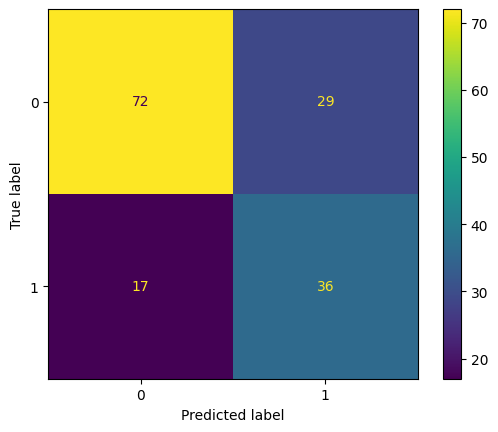

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

###9. Explainability (explicabilité)

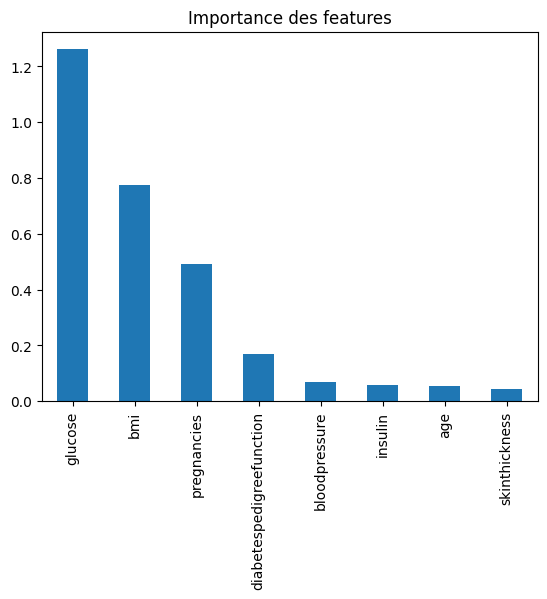

In [ ]:
import numpy as np

coeffs = pd.Series(np.abs(model.coef_[0]), index=X.columns)
coeffs.sort_values(ascending=False).plot(kind='bar')
plt.title("Importance des features")
plt.show()

## 10. Conclusion
### Le modèle atteint une bonne performance globale, mais une attention particulière doit être portée sur le rappel (recall) pour éviter les faux négatifs.

### Glucose, BMI, et Age sont souvent les plus influents.

### Des données plus riches (ex. : historiques médicaux, tests complémentaires) pourraient améliorer la prédiction.

### Recommandation : inclure ce modèle dans un pipeline médical d’aide à la décision, jamais en remplacement d’un diagnostic humain.